# Tumor segmentation

The aim of this project is to segment the tumor of a brain automatically. The following steps enable to segment the image: 
* apply canny edge detector, i choose to use this filter because it detects edge with low error rate 
* find markers automatically using the local minima of the gradient
* Label connected regions of markers 
* apply watershed algorithm

To  following steps enable to get the tumor after semgentation:
* label the objects
* use regionprops function to extract the Eccentricity of the objects
* get the index of the smallest  eccentricity object because the turmor looks like a disk so the value should be near zero 
* get the area in pixels using Regionprops.area

The tumor slide is estimated to 46.21 cm^2.



5
area 2679
tumor in cm 46.20815


<IPython.core.display.Javascript object>


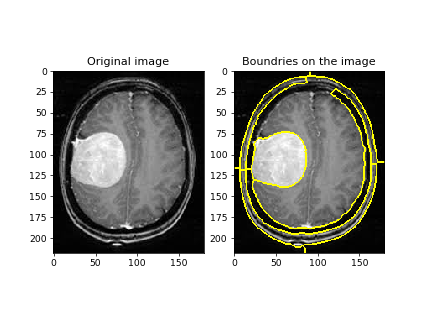

<IPython.core.display.Javascript object>


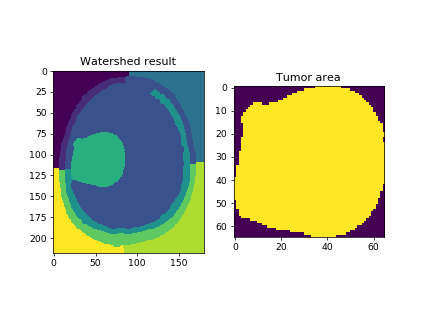

Text(0.5, 1.0, 'Tumor area')

In [245]:
from PIL import Image
import numpy as np
from skimage.morphology import watershed
from skimage.segmentation import mark_boundaries
from skimage.measure import label
from skimage.io import imread,imshow,imsave
from skimage.filters.rank import gradient
from skimage.color import rgb2gray
from skimage.feature import peak_local_max, canny
from skimage.measure import regionprops
from skimage.morphology import disk
import matplotlib.pyplot as plt
%matplotlib notebook

image = imread('mri_brain.jpg')
im = canny(rgb2gray(image),sigma = 3)

grad = gradient(im, disk(1)) 
grad_i = grad.max()-grad # inverse gradient image so that local minima -> local maxima

markers = label(peak_local_max(grad_i, indices=False, threshold_rel=0.99,min_distance=20))
ws = watershed(grad, markers)
label = label(ws)

region = regionprops(label)
ellipse=[]
for i in (region):
    ellipse.append(i.eccentricity) 
    
print(ellipse.index(min(ellipse)))

print('area',region[4].area)
print('tumor in cm', region[ellipse.index(min(ellipse))].area *  0.115**2 )

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')
plt.show()

plt.subplot(1,2,2)
plt.imshow(mark_boundaries(image,ws))
plt.title('Boundries on the image')
plt.show()

plt.figure()
plt.subplot(1,2,1)
plt.imshow(ws)
plt.show()
plt.title('Watershed result')

plt.subplot(1,2,2)
plt.imshow(region[ellipse.index(min(ellipse))].image)
plt.show()
plt.title('Tumor area')

